In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
import re
import requests
from bs4 import BeautifulSoup
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps


In [2]:
book_1_urls = [
    "/atthemovies/scripts/fellowshipofthering1to4.php",
    "/atthemovies/scripts/fellowshipofthering5to8.php",
    "/atthemovies/scripts/fellowshipofthering9to12.php",
    "/atthemovies/scripts/fellowshipofthering13to16.php",
    "/atthemovies/scripts/fellowshipofthering17to20.php",
    "/atthemovies/scripts/fellowshipofthering21to24.php",
    "/atthemovies/scripts/fellowshipofthering25to28.php",
    "/atthemovies/scripts/fellowshipofthering29to32.php",
    "/atthemovies/scripts/fellowshipofthering33to36.php",
    "/atthemovies/scripts/fellowshipofthering37to40.php",
    "/atthemovies/scripts/fellowshipofthering41to44.php",
    "/atthemovies/scripts/fellowshipofthering45to46.php",
    ]

book_2_urls = [
    "/atthemovies/scripts/thetwotowers1to4.php",
    "/atthemovies/scripts/thetwotowers5to8.php",
    "/atthemovies/scripts/thetwotowers9to12.php",
    "/atthemovies/scripts/thetwotowers13to16.php",
    "/atthemovies/scripts/thetwotowers17to20.php",
    "/atthemovies/scripts/thetwotowers21to24.php",
    "/atthemovies/scripts/thetwotowers25to28.php",
    "/atthemovies/scripts/thetwotowers29to32.php",
    "/atthemovies/scripts/thetwotowers33to36.php",
    "/atthemovies/scripts/thetwotowers37to40.php",
    "/atthemovies/scripts/thetwotowers41to44.php",
    "/atthemovies/scripts/thetwotowers45to44.php",
    "/atthemovies/scripts/thetwotowers49to52.php",
    "/atthemovies/scripts/thetwotowers53to56.php",
    "/atthemovies/scripts/thetwotowers57to60.php",
    "/atthemovies/scripts/thetwotowers61to64.php",
    "/atthemovies/scripts/thetwotowers65to66.php",
]

book_3_urls = [
    "/atthemovies/scripts/returnoftheking1to4.php",
    "/atthemovies/scripts/returnoftheking5to8.php",
    "/atthemovies/scripts/returnoftheking9to12.php",
    "/atthemovies/scripts/returnoftheking13to16.php",
    "/atthemovies/scripts/returnoftheking17to20.php",
    "/atthemovies/scripts/returnoftheking21to24.php",
    "/atthemovies/scripts/returnoftheking25to28.php",
    "/atthemovies/scripts/returnoftheking29to32.php",
    "/atthemovies/scripts/returnoftheking33to36.php",
    "/atthemovies/scripts/returnoftheking37to40.php",
    "/atthemovies/scripts/returnoftheking41to44.php",
    "/atthemovies/scripts/returnoftheking45to48.php",
    "atthemovies/scripts/returnoftheking49to52.php",
    "atthemovies/scripts/returnoftheking53to56.php",
    "atthemovies/scripts/returnoftheking57to60.php",
    "atthemovies/scripts/returnoftheking61to64.php",
    "atthemovies/scripts/returnoftheking65to68.php",
    "atthemovies/scripts/returnoftheking69to72.php",
    "atthemovies/scripts/returnoftheking73to76.php",
]

movie_urls = [book_1_urls, book_2_urls, book_3_urls]
movie_names = [
    "The Fellowship of the Ring",
    "The Two Towers",
    "The Return of the King",
]

combined_data = pd.DataFrame(columns=["character", "text", "scene", "movie"])

for movie_name, urls in zip(movie_names, movie_urls):

    for url in urls:
        print(url)

        page = requests.get("http://www.ageofthering.com/" + url)
        soup = BeautifulSoup(page.content, 'html.parser')

        speakers = []
        texts = []
        scene_names = []

        speaker_found = False
        scene_found = False
        for i, table in enumerate(soup.find_all("table")):

            speaker = 0

            for ii, row in enumerate(table.find_all("td")):
                if re.search(r"Scene\s[0-9]+", row.text):
                    scene_found = True
                    scene_name = row.text.strip().replace("\r\n", "")
                    continue

                if not scene_found: continue
                    
                if not speaker_found and row.get("valign") == "top" and row.get("colspan") == None:
                    speaker = row.text.strip().replace(":","")
                    if speaker.isupper():
                        speakers.append(speaker)
                        speaker_found = True
                        scene_names.append(scene_name)

                elif speaker_found:
                    text = " ".join(row.text.replace("\r\n", "").split()).strip()
                    text = re.sub(r"\(.*?\)", r"", text)
                    texts.append(text)
                    speaker_found = False

        scene_data = pd.DataFrame({"character":speakers, "text":texts, "scene": scene_names, "movie": movie_name})
        combined_data = pd.concat((combined_data, scene_data), axis=0)

combined_data


/atthemovies/scripts/fellowshipofthering1to4.php
/atthemovies/scripts/fellowshipofthering5to8.php
/atthemovies/scripts/fellowshipofthering9to12.php
/atthemovies/scripts/fellowshipofthering13to16.php
/atthemovies/scripts/fellowshipofthering17to20.php
/atthemovies/scripts/fellowshipofthering21to24.php
/atthemovies/scripts/fellowshipofthering25to28.php
/atthemovies/scripts/fellowshipofthering29to32.php
/atthemovies/scripts/fellowshipofthering33to36.php
/atthemovies/scripts/fellowshipofthering37to40.php
/atthemovies/scripts/fellowshipofthering41to44.php
/atthemovies/scripts/fellowshipofthering45to46.php
/atthemovies/scripts/thetwotowers1to4.php
/atthemovies/scripts/thetwotowers5to8.php
/atthemovies/scripts/thetwotowers9to12.php
/atthemovies/scripts/thetwotowers13to16.php
/atthemovies/scripts/thetwotowers17to20.php
/atthemovies/scripts/thetwotowers21to24.php
/atthemovies/scripts/thetwotowers25to28.php
/atthemovies/scripts/thetwotowers29to32.php
/atthemovies/scripts/thetwotowers33to36.php
/a

,character,text,scene,movie
0,GALADRIEL VOICE OVER,I amar prestar aen . Han mathon ne nen Han ma...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
1,GALADRIEL VOICE OVER,It began with the forging of the Great Rings.,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
2,GALADRIEL VOICE OVER,"Three were given to the elves. Immortal, wise...",Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
3,GALADRIEL VOICE OVER,For within these rings was bound the strength ...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
4,GALADRIEL VOICE OVER,One by one the free lands of Middle Earth fell...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
...,...,...,...,...
34,FRODO,We set out to save the Shire Sam and it has be...,Scene 76 ~ The Grey Havens,The Return of the King
35,SAM,You don’t mean that. You can’t leave.,Scene 76 ~ The Grey Havens,The Return of the King
36,FRODO,The last pages are for you Sam.,Scene 76 ~ The Grey Havens,The Return of the King
37,FRODO VOICE OVER,"My dear Sam, you cannot always be torn in two....",Scene 76 ~ The Grey Havens,The Return of the King


In [3]:
# get_missing text
with open("data/missing_text_37_to_end.txt") as f:
    raw_missing_text = f.read()

raw_missing_text# %%

raw_missing_text  = re.sub(r"\(.*?\)", r"", raw_missing_text)
raw_missing_text = raw_missing_text.split("\n")
raw_missing_text = [x for x in raw_missing_text if x != ""]
raw_missing_text

['Haldir: Caras Galadhon. The heart of Elvendom on earth. Realm of the Lord Celeborn and of Galadriel, Lady of Light.',
 'Celeborn: The Enemy knows you have entered here. What hope you had in secrecy is now gone. Eight that are here yet nine there were set out from Rivendell. Tell me where is Gandalf? For I much desire to speak with him. I can no longer see him from afar.',
 'Galadriel: Gandalf the Grey did not pass the borders of this land. He has fallen into Shadow. ',
 'Legolas: He was taken by both Shadow and flame. A Balrog of Morgoth. For we went needlessly into the net of Moria.',
 'Galadriel: Needless were none of the deeds of Gandalf in life. We do not yet know his full purpose.  Do not let the great emptiness of Khazad-dûm fill your heart, Gimli, son of Glóin. For the world has grown full of peril. And in all lands love is now mingled with grief.',
 'Celeborn: What now becomes of this Fellowship? Without Gandalf, hope is lost.',
 'Galadriel: The quest stands upon the edge of 

In [4]:
speakers = []
texts = []
for item in raw_missing_text:
    try:
        (speaker, text) = item.split(":", maxsplit=1)
        speakers.append(speaker.upper())
        texts.append(text)
    except:
        print(item)


In [5]:

# source: https://www.councilofelrond.com/subject/the-fellowship-of-the-ring-extended-edition/
# ends at 15
# starts 16, ends 28
# starts 29, ends 32
# starts 33, ends 49
# starts 50, ends 62
# starts 63, ends 139
# starts 140, ends 157
# starts at 157, ends at 157
# starts at 158, ends at 162
scenes = \
    ["Scene 38 ~ Caras Galadhon"] * 16 + \
    ["Scene 39 ~ The Mirror of Galadriel"] * 13 + \
    ["Scene 40 ~ The Fighting Uruk-hai"] * 4 + \
    ["Scene 41 ~ Farewell to Lorien"] * 17 + \
    ["Scene 42 ~ The Great River"] * 13 + \
    ["Scene 43 ~ Parth Galen"] * 77 + \
    ["Scene 44 ~ The Breaking of the Fellowship"] * 18 + \
    ["Scene 45 ~ The Departure of Boromir"] * 0 + \
    ["Scene 46 ~ The Road Goes Ever On"] * 5 
    
missing_text = pd.DataFrame({"character":speakers, "text":texts, "scene": scenes, "movie": movie_names[0]})


In [6]:
before_missing = combined_data[combined_data["movie"] == movie_names[0]]
after_missing = combined_data[combined_data["movie"] != movie_names[0]]
full_data = pd.concat([before_missing, missing_text, after_missing]).reset_index(drop=True)
full_data.to_csv("./data/lotr_script_extended.csv")
full_data


,character,text,scene,movie
0,GALADRIEL VOICE OVER,I amar prestar aen . Han mathon ne nen Han ma...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
1,GALADRIEL VOICE OVER,It began with the forging of the Great Rings.,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
2,GALADRIEL VOICE OVER,"Three were given to the elves. Immortal, wise...",Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
3,GALADRIEL VOICE OVER,For within these rings was bound the strength ...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
4,GALADRIEL VOICE OVER,One by one the free lands of Middle Earth fell...,Scene 1 ~ Prologue: One Ring to Rule Them All...,The Fellowship of the Ring
...,...,...,...,...
2810,FRODO,We set out to save the Shire Sam and it has be...,Scene 76 ~ The Grey Havens,The Return of the King
2811,SAM,You don’t mean that. You can’t leave.,Scene 76 ~ The Grey Havens,The Return of the King
2812,FRODO,The last pages are for you Sam.,Scene 76 ~ The Grey Havens,The Return of the King
2813,FRODO VOICE OVER,"My dear Sam, you cannot always be torn in two....",Scene 76 ~ The Grey Havens,The Return of the King


In [7]:
# find main characters by counting speaking lines
main_characters = list(full_data["character"].value_counts().index[:15])
main_characters# %%


['FRODO',
 'GANDALF',
 'SAM',
 'ARAGORN',
 'PIPPIN',
 'MERRY',
 'GOLLUM',
 'GIMLI',
 'THEODEN',
 'BOROMIR',
 'LEGOLAS',
 'FARAMIR',
 'BILBO',
 'EOWYN',
 'SARUMAN']

In [8]:
# count interactions
G = nx.Graph()

scene_id_before = -1
for i in range(len(full_data)-1):

    # check if scene of text is the same
    if full_data.iloc[i]["scene"] != scene_id_before:
        scene_id_before = full_data.iloc[i]["scene"]
        continue

    # scene_id_before = full_data.iloc[i]["scene"]
    
    # get characters from the lines
    c1 = full_data["character"].iloc[i-1]
    c2 = full_data["character"].iloc[i]

    if c1 not in main_characters or c2 not in main_characters:
        continue

    sorted_characters = sorted([c1, c2])
    try:
        G.edges[sorted_characters]["weight"] += 1
    except KeyError:
        G.add_edge(sorted_characters[0], sorted_characters[1], weight=1)

    

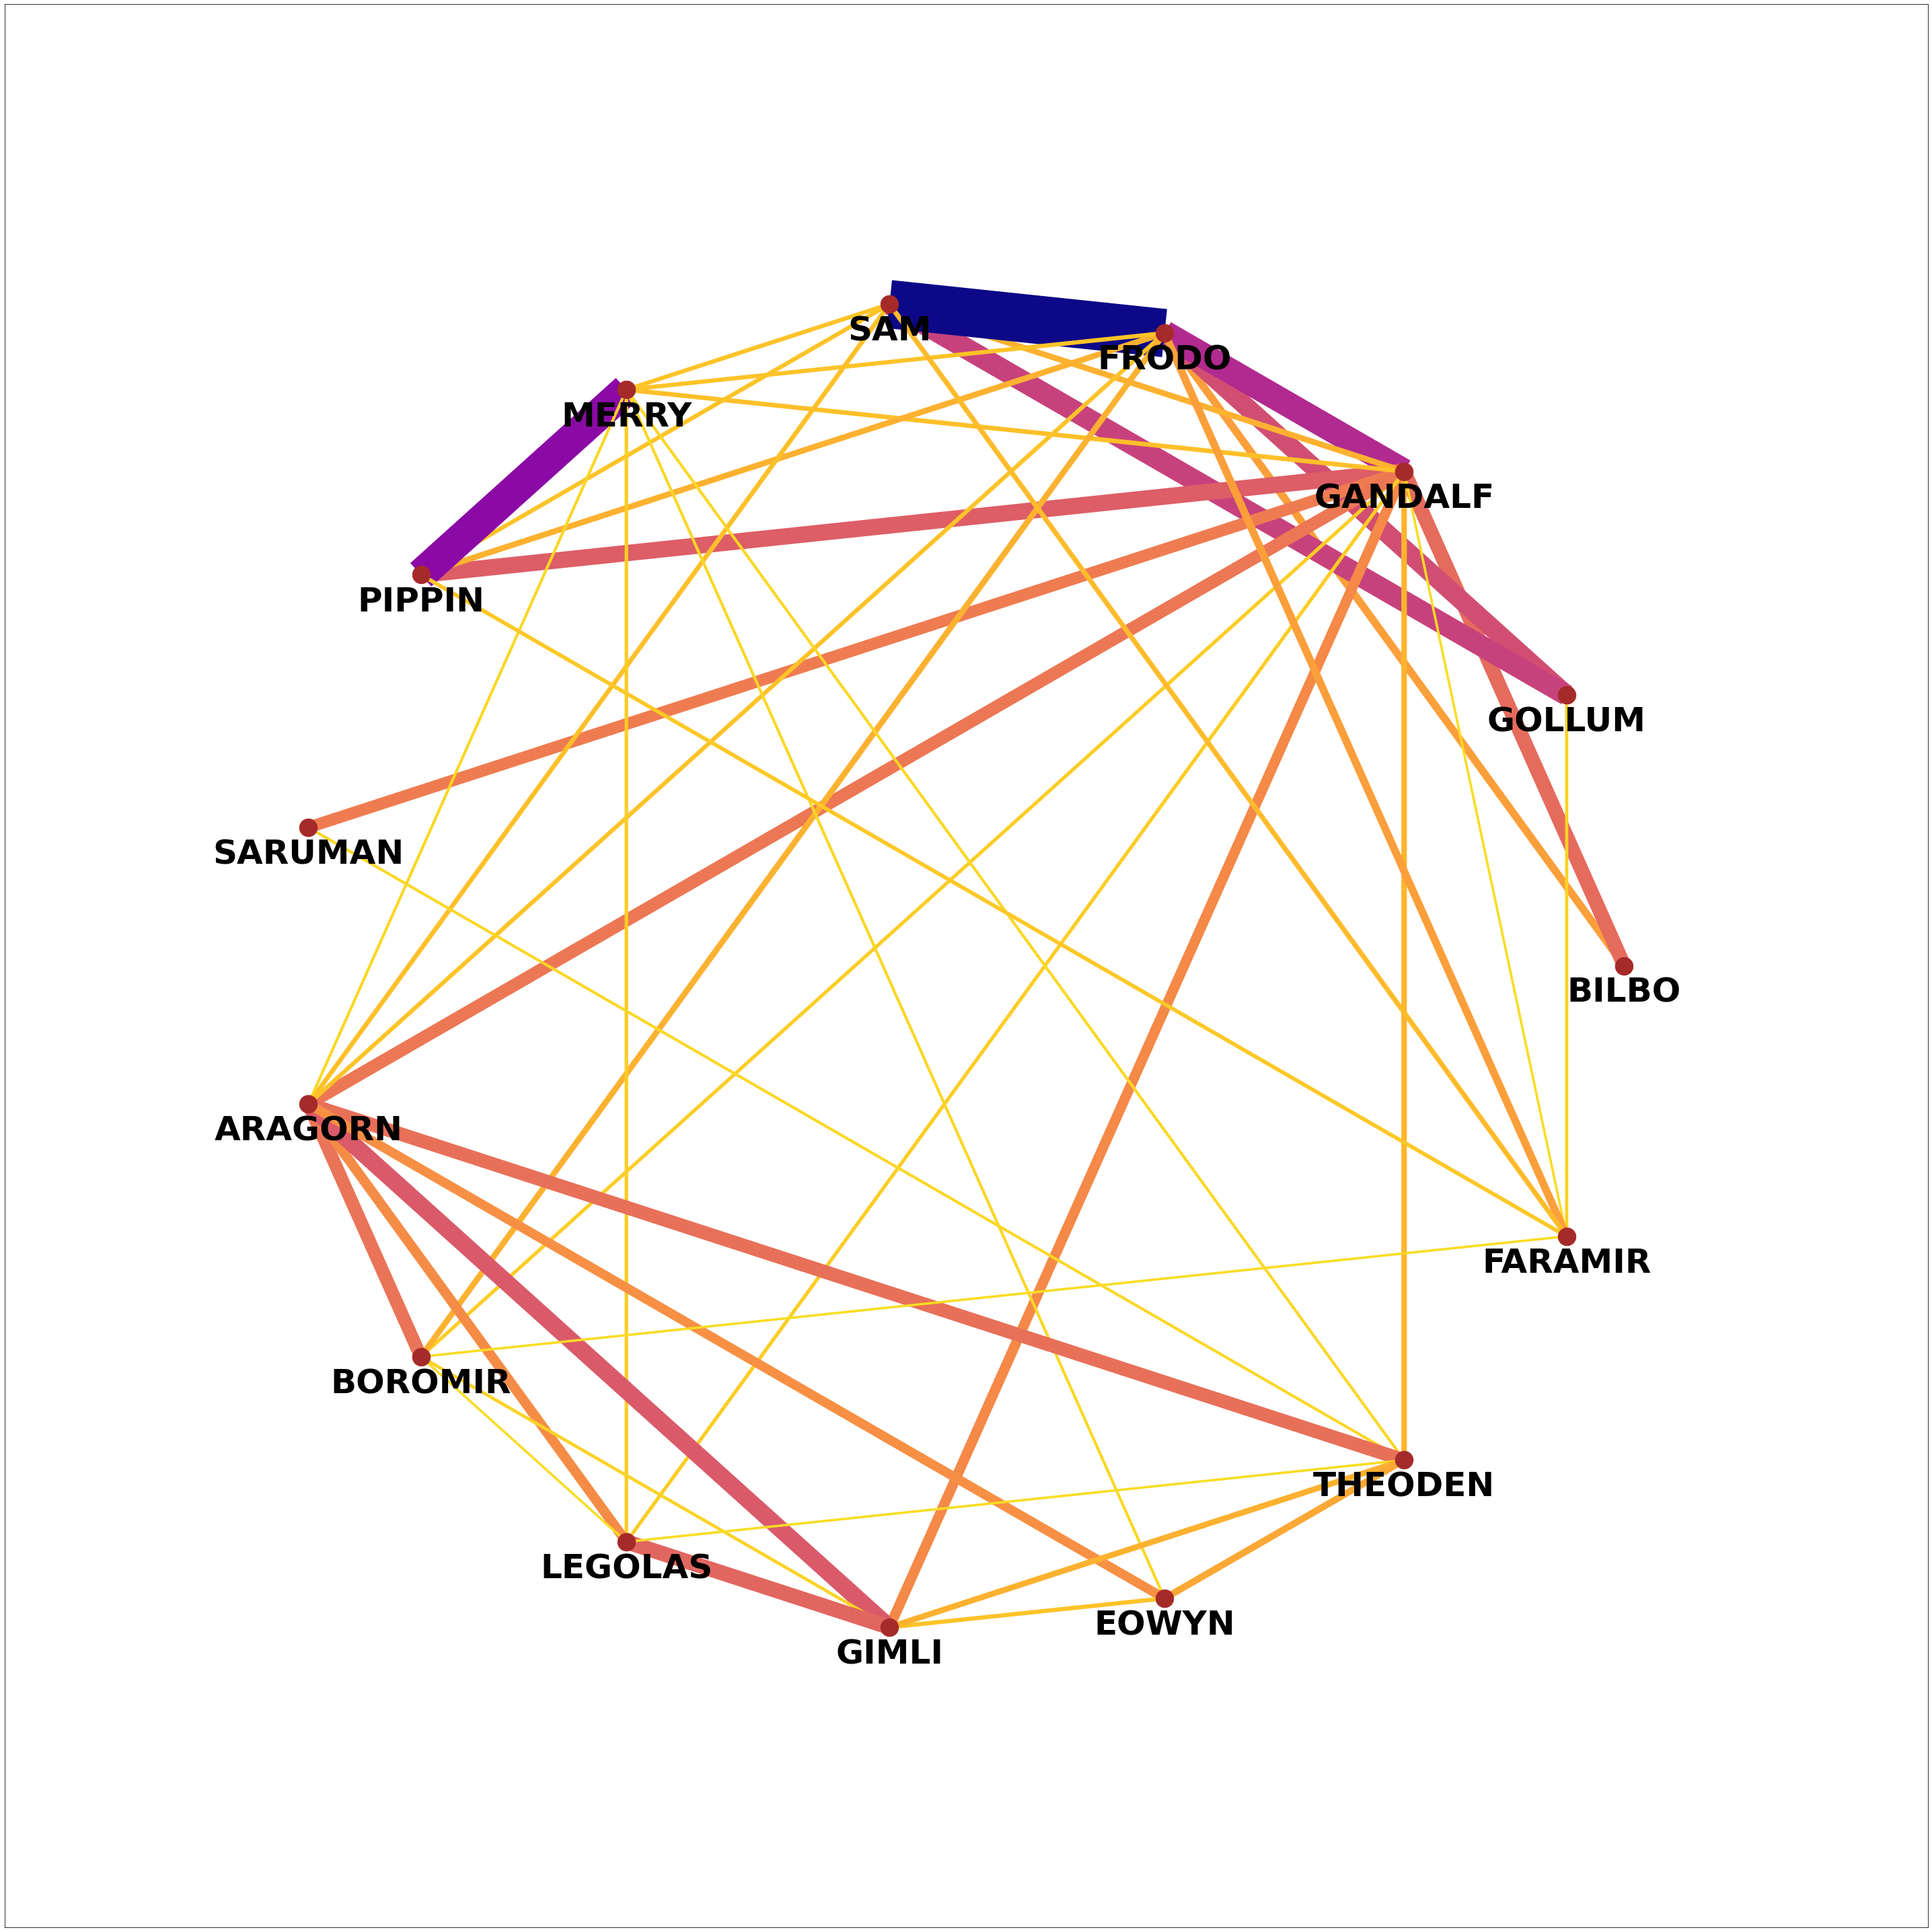

In [9]:
# make absolute interaction graph
plt.figure(figsize=(40,40))

pos = nx.circular_layout(G) 
# pos = nx.spring_layout(G) 

edges = G.edges()
colors = [G[u][v]['weight']**0.6 for u,v in edges]
weights = [G[u][v]['weight']**0.8 if G[u][v]['weight'] > 4 else 0 for u,v in edges]

cmap = matplotlib.cm.get_cmap('plasma_r')
# cmap = matplotlib.cm.get_cmap('ocean')
nx.draw_networkx(G, pos, width=weights, edge_color=colors, node_color="brown", edge_cmap=cmap, with_labels=False, node_size=700)

labels_pos = {name:[pos_list[0], pos_list[1]-0.04] for name, pos_list in pos.items()}
nx.draw_networkx_labels(G, labels_pos, font_size=50, font_family="sans-serif", font_color="#000000", font_weight="bold")

ax = plt.gca()
ax.margins(0.25)
plt.axis("equal")
plt.tight_layout()
plt.savefig("./output/connection_graph_raw.png")

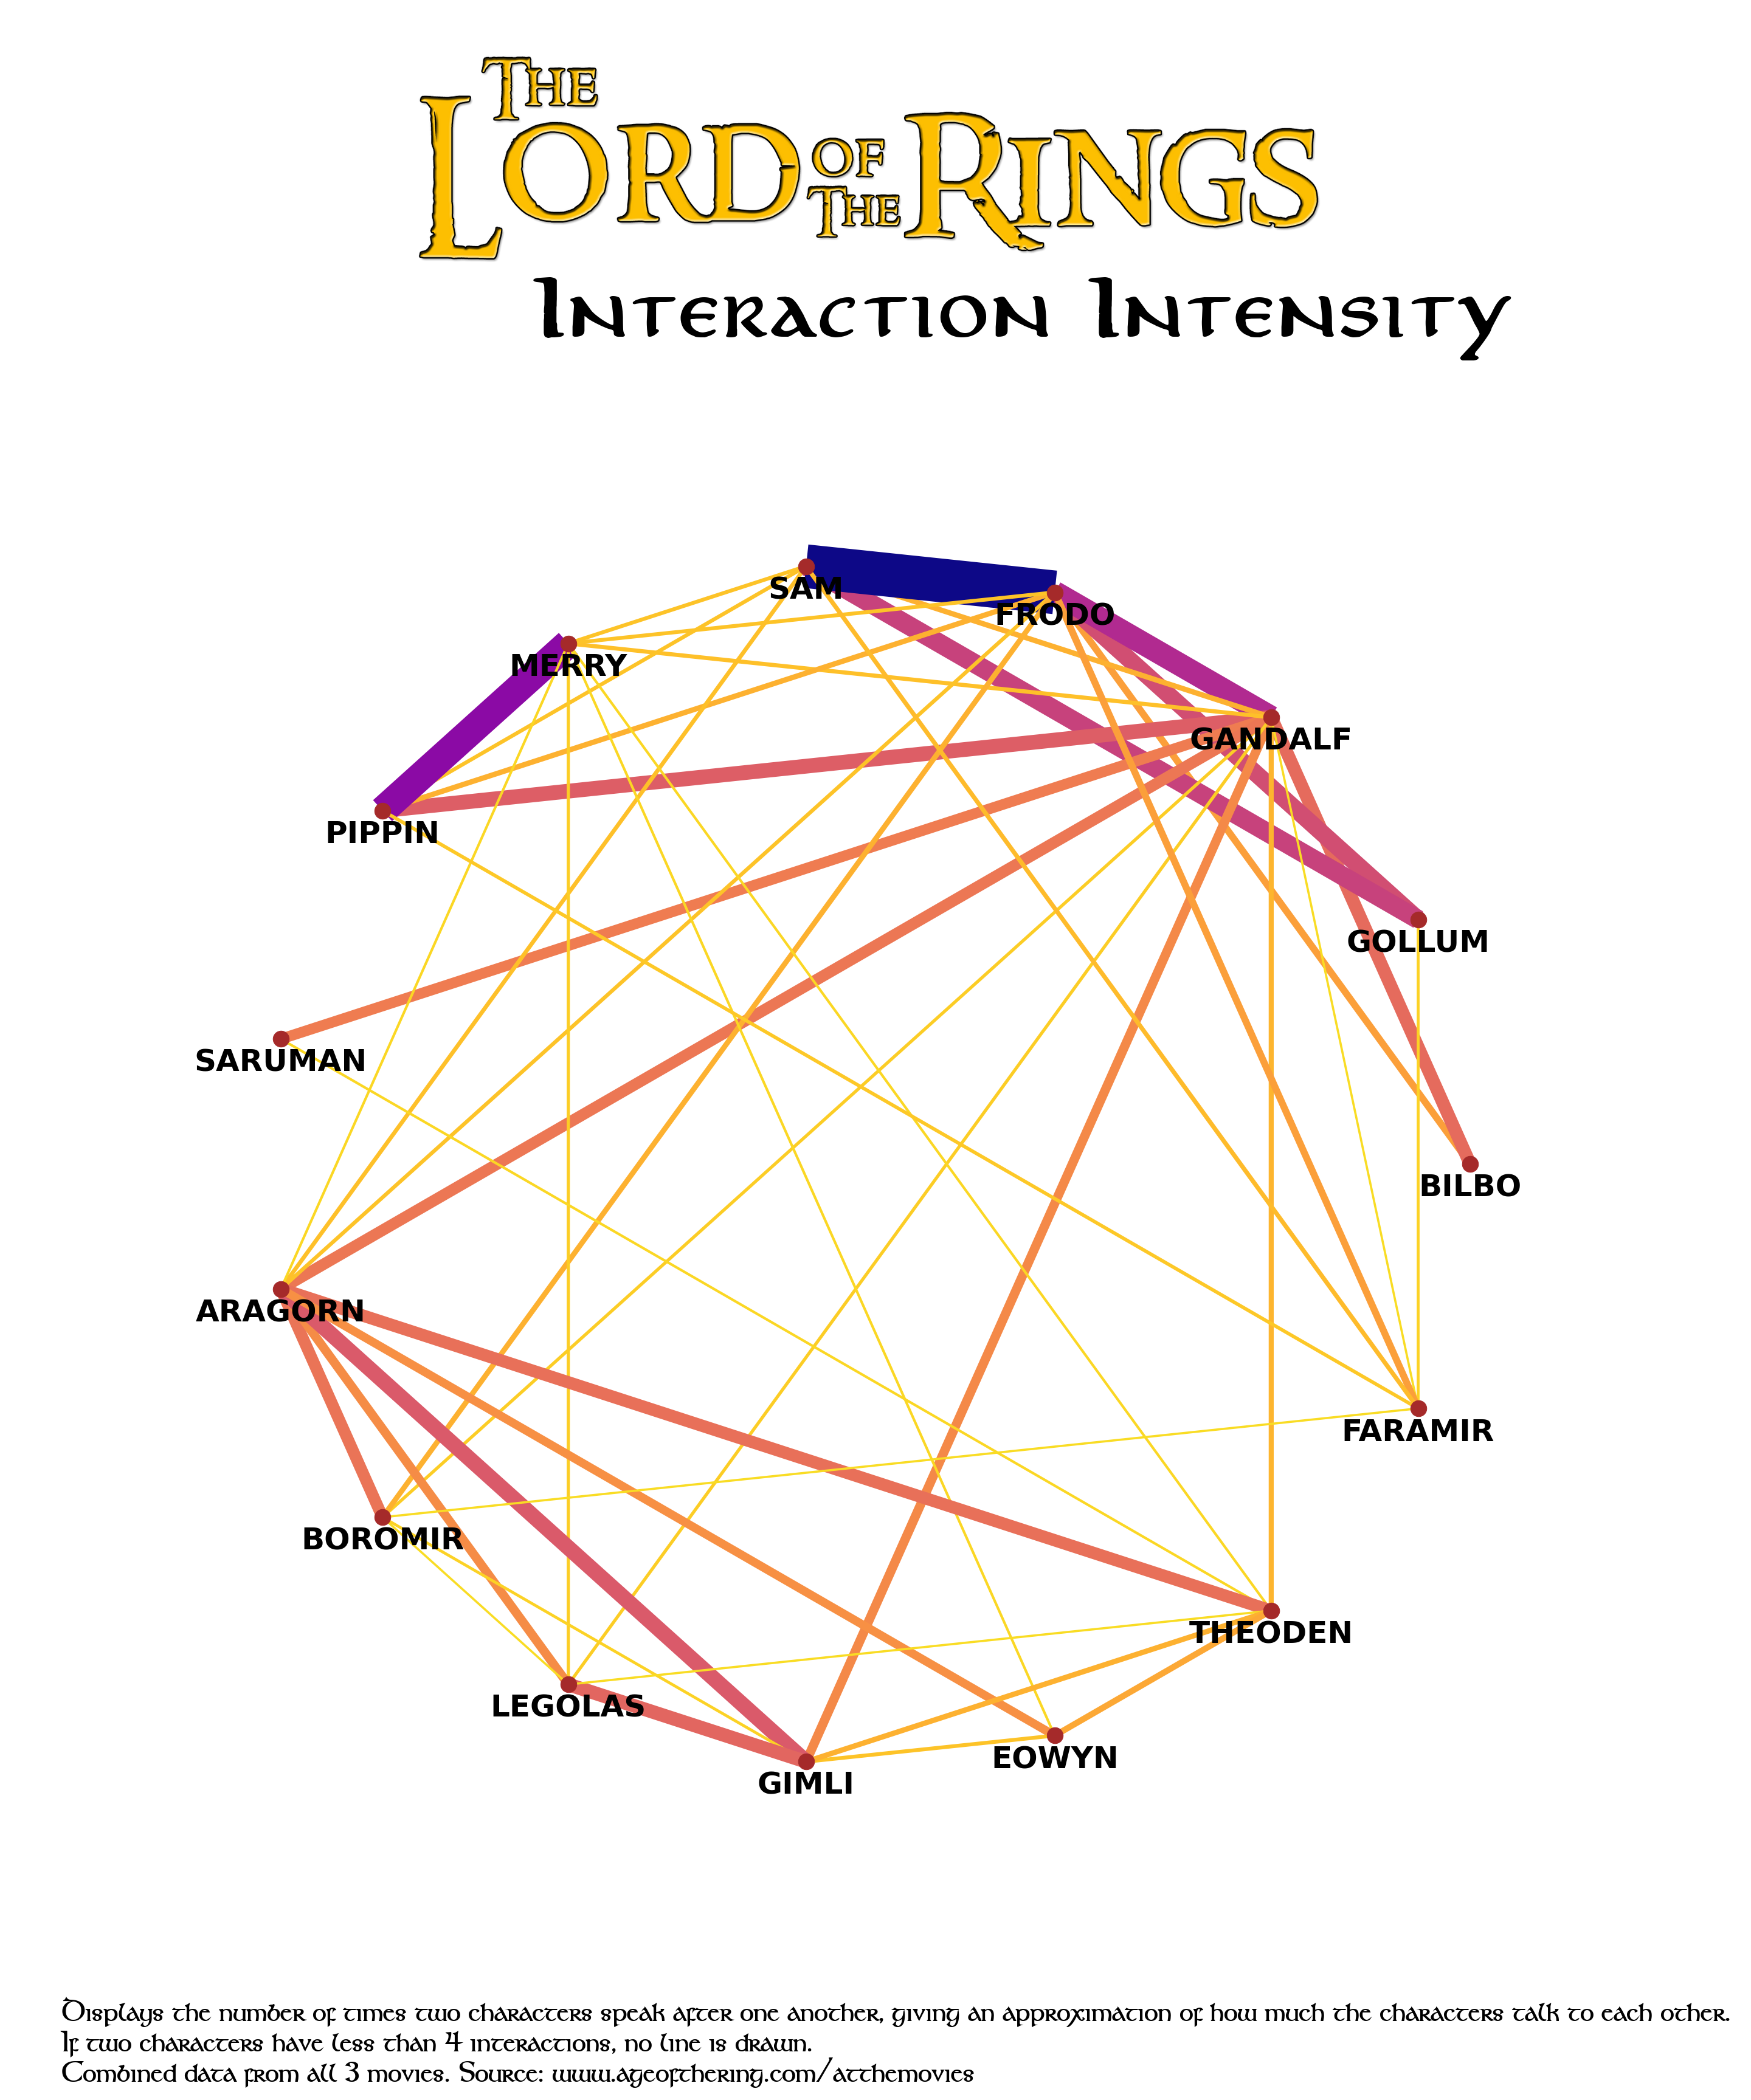

In [10]:
img = Image.open("./output/connection_graph_raw.png")

# adjust size
width, height = img.size
img = img.crop((25, 25, width-25, height-25))
img = ImageOps.expand(img, (25, 500, 25,125), fill="white")
draw = ImageDraw.Draw(img)

# add title card
title_card_img = Image.open("./fonts/title_card.png")
width, height = title_card_img.size
title_card_img = title_card_img.resize((int(width * 1), int(height * 1)), Image.ANTIALIAS)
img.paste(title_card_img, (630, 10), mask=title_card_img)

# add subtitle
font = ImageFont.truetype("./fonts/aniron/anirb___.ttf", size=105)
draw.text((880, 400),"Interaction Intensity", (0,0,0), font=font,)

# add description
font = ImageFont.truetype("./fonts/kelt/KELTB___.TTF", size=55)
description = \
"""
Displays the number of times two characters speak after one another, giving an approximation of how much the characters talk to each other. 
If two characters have less than 4 interactions, no line is drawn. 
Combined data from all 3 movies. Source: www.ageofthering.com/atthemovies
"""
draw.text((100, 3230), description, (0,0,0), font=font)

# font = ImageFont.truetype("/usr/share/fonts/truetype/Ubuntu/Ubuntu-L.ttf", 40)
# draw.text((100, 3390), "Source: www.ageofthering.com/atthemovies", (0,0,0), font=font)


img.save("./output/connection_graph_text.png")

display(img)
